# Car Price Prediction

# About The Data
This dataset contains information about used cars listed on www.cardekho.com.

# Formulate the problem
Finding predictions of price with the use of regression models.

* import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Load the Data

In [3]:
df = pd.read_csv("car data.csv")

* Data Exploration

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

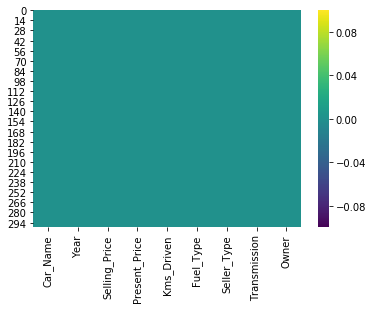

In [7]:
#There is no null values or missing data
sns.heatmap(df.isnull(), cmap="viridis")

In [8]:
print (df['Fuel_Type'].dtypes)
print (df['Seller_Type'].dtypes)
print (df['Transmission'].dtypes)

object
object
object


In [9]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
# Change the data type from object values to numerical values 

df.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
df.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
df.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
df[["Fuel_Type","Seller_Type","Transmission"]] = df[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

#  Exploratory Data Analysis (EDA) and Data Visualization

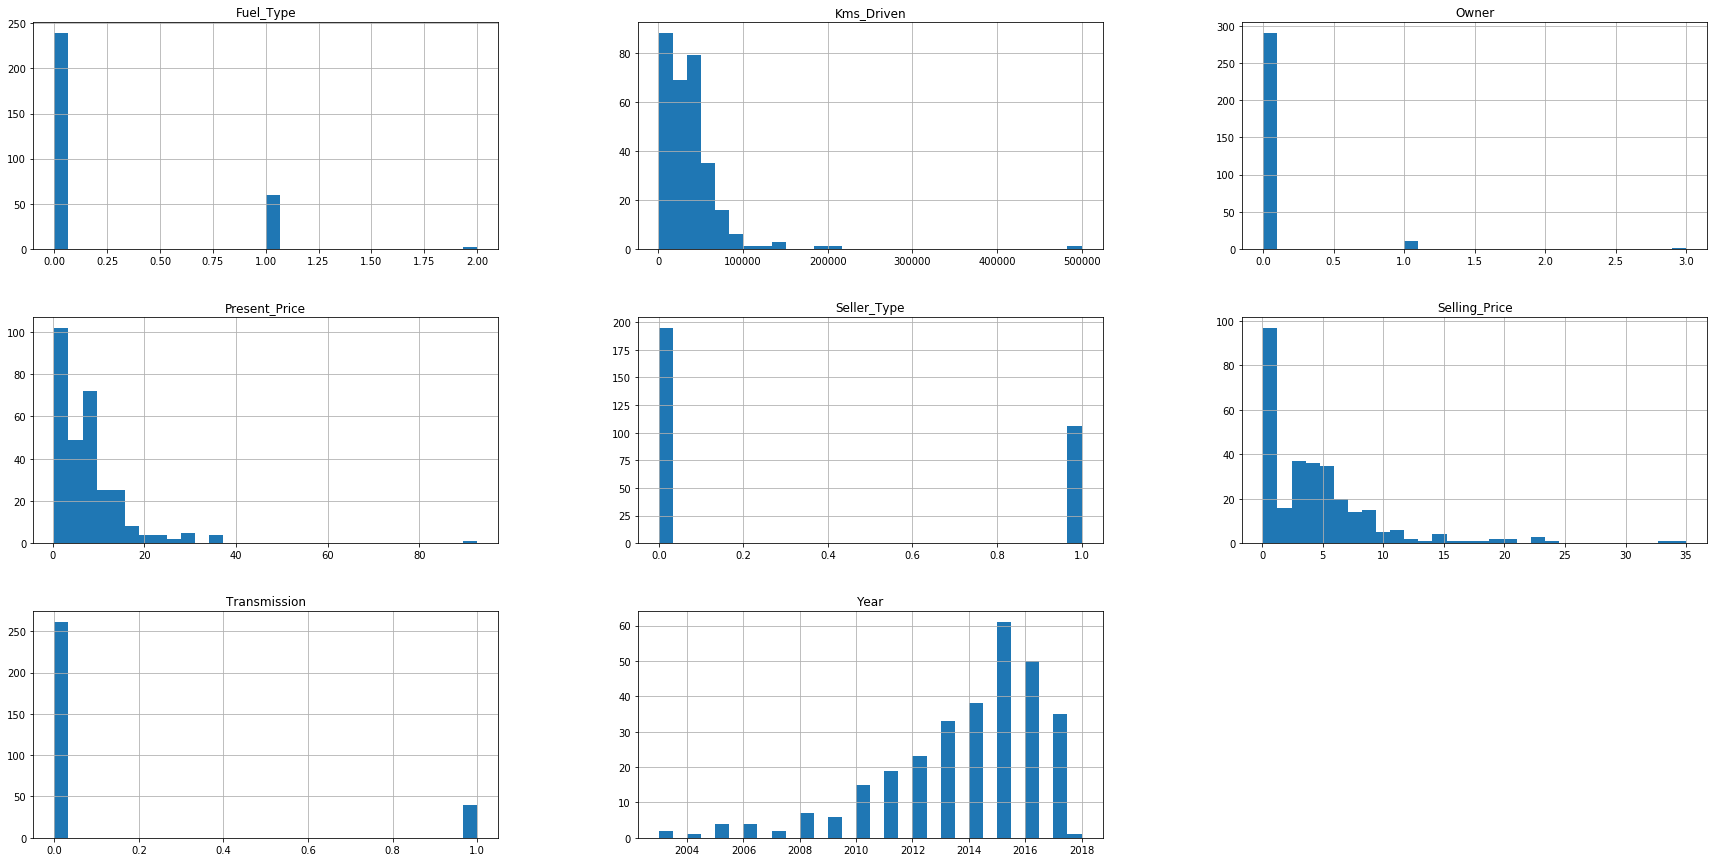

In [10]:
df.hist(bins=30,figsize=(30,15))
plt.show()

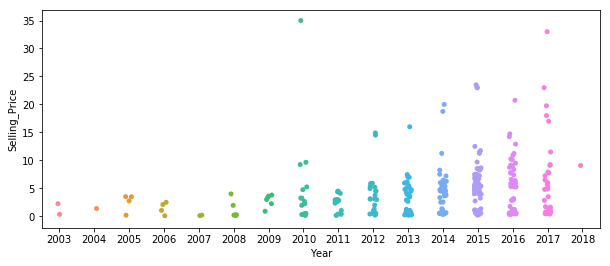

In [11]:
plt.figure(figsize=(10,4))
sns.stripplot(x="Year",y="Selling_Price", data=df);

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


Feature Engineering
y = df.Selling_Price
x = df.drop(["Selling_Price","Car_Name"], axis=1)

# Feature Engineering

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
selected_features = ["Year","Present_Price","Selling_Price","Fuel_Type","Seller_Type","Transmission"]
df_final = df[selected_features]
df_final

,Selling_Price,Year,Present_Price,Fuel_Type,Seller_Type,Transmission
0,3.35,2014,5.59,0,0,0
1,4.75,2013,9.54,1,0,0
2,7.25,2017,9.85,0,0,0
3,2.85,2011,4.15,0,0,0
4,4.60,2014,6.87,1,0,0
5,9.25,2018,9.83,1,0,0
6,6.75,2015,8.12,0,0,0
7,6.50,2015,8.61,1,0,0
8,8.75,2016,8.89,1,0,0
9,7.45,2015,8.92,1,0,0


In [15]:
df_final.head()

,Selling_Price,Year,Present_Price,Fuel_Type,Seller_Type,Transmission
0,3.35,2014,5.59,0,0,0
1,4.75,2013,9.54,1,0,0
2,7.25,2017,9.85,0,0,0
3,2.85,2011,4.15,0,0,0
4,4.60,2014,6.87,1,0,0


In [60]:
df_final.to_csv('cleaned_data.csv')

# Linear Regression

In [16]:
columns = ["Year","Present_Price","Fuel_Type","Seller_Type","Transmission"]
y = df_final['Selling_Price'].values
x = df_final[list(columns)].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [19]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 5)
x test:  (61, 5)
y train:  (240,)
y test:  (61,)


In [20]:
from sklearn import linear_model

In [21]:
regression = linear_model.LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_train_predict = regression.predict(x_train)
y_test_predict = regression.predict(x_test)

# Evaluate model performance

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)

print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))

mse_test = mean_squared_error(y_test, y_test_predict)
mae_test = mean_absolute_error(y_test, y_test_predict)

print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= regression.score(x_test, y_test)
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is 1.843563767409548
MAE is 1.225326899873559
The model performance for testing set
RMSE is 1.567338770331714
MAE is 1.1116088767155377
---------------------------------------
The score of model for testing set
Test score 0.89


In [24]:
compare={"Actual":y_test, "Predict":y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
0,2.55,3.111569
1,4.80,5.373408
2,0.35,-0.777926
3,7.75,8.400571
4,1.35,1.749680
5,0.45,-1.308369
6,1.05,-0.704082
7,5.75,5.960104
8,2.85,1.727570
9,9.25,8.949752


# Visualize the Result

In [25]:
idx = np.random.choice(x_test.shape[0])
print("Predicted price :", y_test_predict[idx])
print("Actual price :", y_test[idx])

Predicted price : 6.3284164492743
Actual price : 6.15


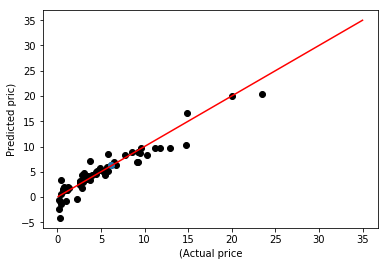

In [26]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('(Actual price')
plt.ylabel('Predicted pric)')
plt.plot([df['Selling_Price'].min(), df['Selling_Price'].max()], [df['Selling_Price'].min(), df['Selling_Price'].max()], color='red')
plt.show()

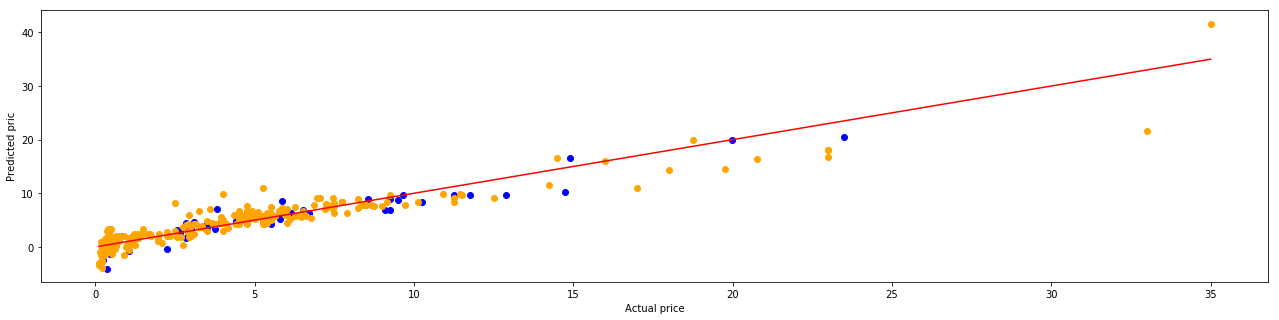

In [27]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df['Selling_Price'].min(), df['Selling_Price'].max()], [df['Selling_Price'].min(), df['Selling_Price'].max()], color='red')
plt.xlabel('Actual price')
plt.ylabel('Predicted pric')
plt.show()

In [28]:
#Save the model
import pickle
filename = 'model.pkl'

pickle.dump(regression, open(filename, 'wb'))

In [29]:
#load the saved model
model_load = pickle.load(open(filename, 'rb'))

In [30]:
#coefficient 
model_load.coef_

array([ 0.48633035,  0.44112499,  1.31227998, -1.13800815,  1.46362595])

In [31]:
#y-intercept b0
model_load.intercept_

-978.1134284334082

In [33]:
from google.colab import files
files.download('model.pkl')

ModuleNotFoundError: No module named 'google'